In [1]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error ,mean_squared_error,median_absolute_error
dataset = pd.read_csv('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\Boston.csv')
print(dataset.head())
print('***'*30)
x_data = dataset.iloc[:,:-1]
y_target = dataset.iloc[:,-1] 
print(x_data.shape)
#print(x_data[:5])
print('***'*30)
print(y_target.shape)
#print(y_target[:5])
print('***'*30)
#Applying Splitting Data 
X_train,X_test,Y_train,Y_test=train_test_split(x_data,y_target,test_size=0.33,random_state=44,shuffle=True)

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
******************************************************************************************
(506, 14)
******************************************************************************************
(506,)
******************************************************************************************


In [3]:
#Applying MLPRegressor Model 
MLPRegressor_Model=MLPRegressor(activation='identity',solver='lbfgs',learning_rate='constant',early_stopping=False,alpha=0.0001,hidden_layer_sizes=(100,8),random_state=33)
MLPRegressor_Model.fit(X_train,Y_train)
#Calculating Details
print('MLPRegressorModel Train Score is : ' , MLPRegressor_Model.score(X_train, Y_train))
print('MLPRegressorModel Test Score is : ' , MLPRegressor_Model.score(X_test, Y_test))
print('MLPRegressorModel loss is : ' , MLPRegressor_Model.loss_)
print('MLPRegressorModel No. of iterations is : ' , MLPRegressor_Model.n_iter_)
print('MLPRegressorModel No. of layers is : ' , MLPRegressor_Model.n_layers_)
print('MLPRegressorModel last activation is : ' , MLPRegressor_Model.out_activation_)
print('----------------------------------------------------')
#Calculating Prediction
y_pred = MLPRegressor_Model.predict(X_test)
print('Predicted Value for MLPRegressorModel is : ' , y_pred[:10])
#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(Y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)
#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(Y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(Y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

MLPRegressorModel Train Score is :  0.7007284666342728
MLPRegressorModel Test Score is :  0.6939418536396353
MLPRegressorModel loss is :  11.505475475586932
MLPRegressorModel No. of iterations is :  200
MLPRegressorModel No. of layers is :  4
MLPRegressorModel last activation is :  identity
----------------------------------------------------
Predicted Value for MLPRegressorModel is :  [18.47678766 20.89171504 21.2727315  32.80372433 11.40799747 32.88992835
 20.55362064 22.75996926 29.67552272 23.85575881]
Mean Absolute Error Value is :  3.6844847289239953
Mean Squared Error Value is :  30.10321885149229
Median Squared Error Value is :  2.1681057904378775


c:\Users\Alhou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


x  = 
 (1000, 1)
y  = 
 (1000,)


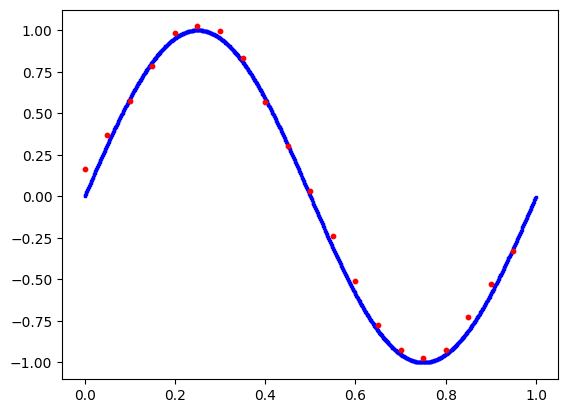

In [4]:
#Example Two 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
x = np.arange(0.0, 1, 0.001).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()
print('x  = \n' ,x.shape)
print('y  = \n' ,y.shape)
nn = MLPRegressor(
    hidden_layer_sizes=(100,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
n = nn.fit(x, y)
test_x = np.arange(0.0, 1, 0.05).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

In [5]:
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#----------------------------------------------------
#load iris data
IrisData = load_iris()
#X Data
X = IrisData.data
#y Data
y = IrisData.target
#----------------------------------------------------
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

MLPClassifierModel Train Score is :  0.98
MLPClassifierModel Test Score is :  0.92
MLPClassifierModel loss is :  0.1014739091464568
MLPClassifierModel No. of iterations is :  200
MLPClassifierModel No. of layers is :  4
MLPClassifierModel last activation is :  softmax
----------------------------------------------------
Predicted Value for MLPClassifierModel is :  [2 0 1 1 2 0 2 2 2 2]
Prediction Probabilities Value for MLPClassifierModel is :  [[3.78631755e-29 6.79563442e-02 9.32043656e-01]
 [1.00000000e+00 7.41631128e-25 1.01530243e-30]
 [3.48780536e-09 9.63862267e-01 3.61377299e-02]
 [8.43687368e-04 9.92257972e-01 6.89834053e-03]
 [3.70794349e-29 6.77961425e-02 9.32203858e-01]
 [1.00000000e+00 7.41601950e-25 1.01521794e-30]
 [3.70772344e-29 6.77953502e-02 9.32204650e-01]
 [3.70779545e-29 6.77960363e-02 9.32203964e-01]
 [3.71544191e-29 6.78115710e-02 9.32188429e-01]
 [4.94688485e-25 1.87624768e-01 8.12375232e-01]]
Confusion Matrix is : 
 [[18  0  0]
 [ 1 11  3]
 [ 0  0 17]]


c:\Users\Alhou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


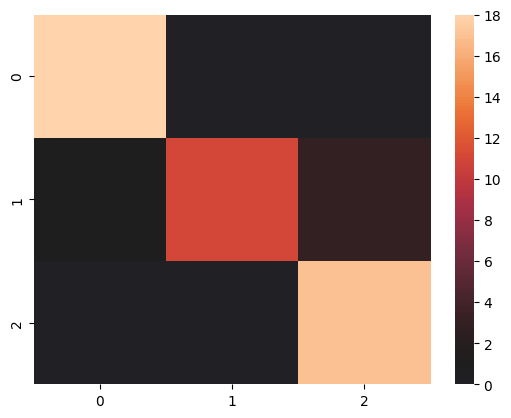

In [6]:
#----------------------------------------------------
#Applying MLPClassifier Model 
'''
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,alpha=0.0001,batch_size='auto’, learning_rate=’constant’,momentum=0.9,
learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,random_state=None, tol=0.0001, verbose=False, warm_start=False, 
n_iter_no_change=10, nesterovs_momentum=True,early_stopping=False, validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,)'''
MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)
#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
print('----------------------------------------------------')
#Calculating Prediction
y_pred = MLPClassifierModel.predict(X_test)
y_pred_prob = MLPClassifierModel.predict_proba(X_test)
print('Predicted Value for MLPClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob[:10])
#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

Iteration 1, loss = 11.34406094
Iteration 2, loss = 11.37134504
Iteration 3, loss = 3.83511946
Iteration 4, loss = 2.84626233
Iteration 5, loss = 1.59617769
Iteration 6, loss = 0.98191110
Iteration 7, loss = 1.01197122
Iteration 8, loss = 1.18898419
Iteration 9, loss = 0.82847246
Iteration 10, loss = 0.81903033
Iteration 11, loss = 0.68004349
Iteration 12, loss = 0.68962666
Iteration 13, loss = 0.70416424
Iteration 14, loss = 0.66151892
Iteration 15, loss = 0.57481294
Iteration 16, loss = 0.58470280
Iteration 17, loss = 0.56371141
Iteration 18, loss = 0.58071918
Iteration 19, loss = 0.52035246
Iteration 20, loss = 0.51704537
Iteration 21, loss = 0.63255104
Iteration 22, loss = 0.53954364
Iteration 23, loss = 0.64119327
Iteration 24, loss = 0.48580134
Iteration 25, loss = 0.46236146
Iteration 26, loss = 0.48585283
Iteration 27, loss = 0.68637440
Iteration 28, loss = 0.46051170
Iteration 29, loss = 0.43663302
Iteration 30, loss = 0.52305096
Iteration 31, loss = 0.42397156
Iteration 32, l

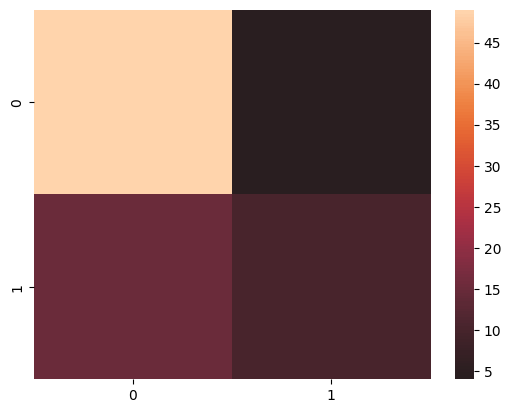

In [8]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix
df = pd.read_csv('D:\\AI\\10 القسم العاشر  مكتبة سايكيتليرن Sklearn Library\\Materials\\Data\\2.3 NN\\Dataset_spine.csv')
df = df.drop(['Unnamed: 13'], axis=1)
df.head()
df.describe()
df = df.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)
df.head()
y = df['Class_att']
x = df.drop(['Class_att'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25,random_state=27)
x_train
x_test
y_train
y_test 
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=500, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, center=True)
plt.show()